# Sales data sample

##Import Library

In [3]:
# manage data
import pandas as pd
import numpy as np

# plot
import seaborn as sns
import matplotlib.pyplot as plt

#data preparetion
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# split data
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_regression

##Import Data

In [4]:
#เGoogle Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Work/DATA/sales_data_sample.csv")
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Data Understanding


##Explore Data

In [6]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
data.shape

(2823, 25)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [10]:
# ตรวจสอบค่า Null
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

จากการตรวจสอบค่า Null 
- ADDRESSLINE2 มีข้อมูลสูญหาย 89.3% จากข้อมูลทั้งหมด ควรตัดออกทั้ง Column
- STATE มีข้อมูลสูญหาย 52.64% จากข้อมูลทั้งหมด ควรตัดออกทั้ง Column
- POSTALCODE มีข้อมูลสูญหาย 2.69% จากข้อมูลทั้งหมด เนื่องจากข้อมูลสูญหายไม่ถึง 5% ควรตัดออกเฉพาะ Row ที่ไม่มีข้อมูล
- TERRITORY มีข้อมูลสูญหาย 38.04% จากข้อมูลทั้งหมด ควรตัดออกทั้ง Column


###Check Value of Numerical variable

In [11]:
numerical_atts = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']

In [12]:
data[numerical_atts].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

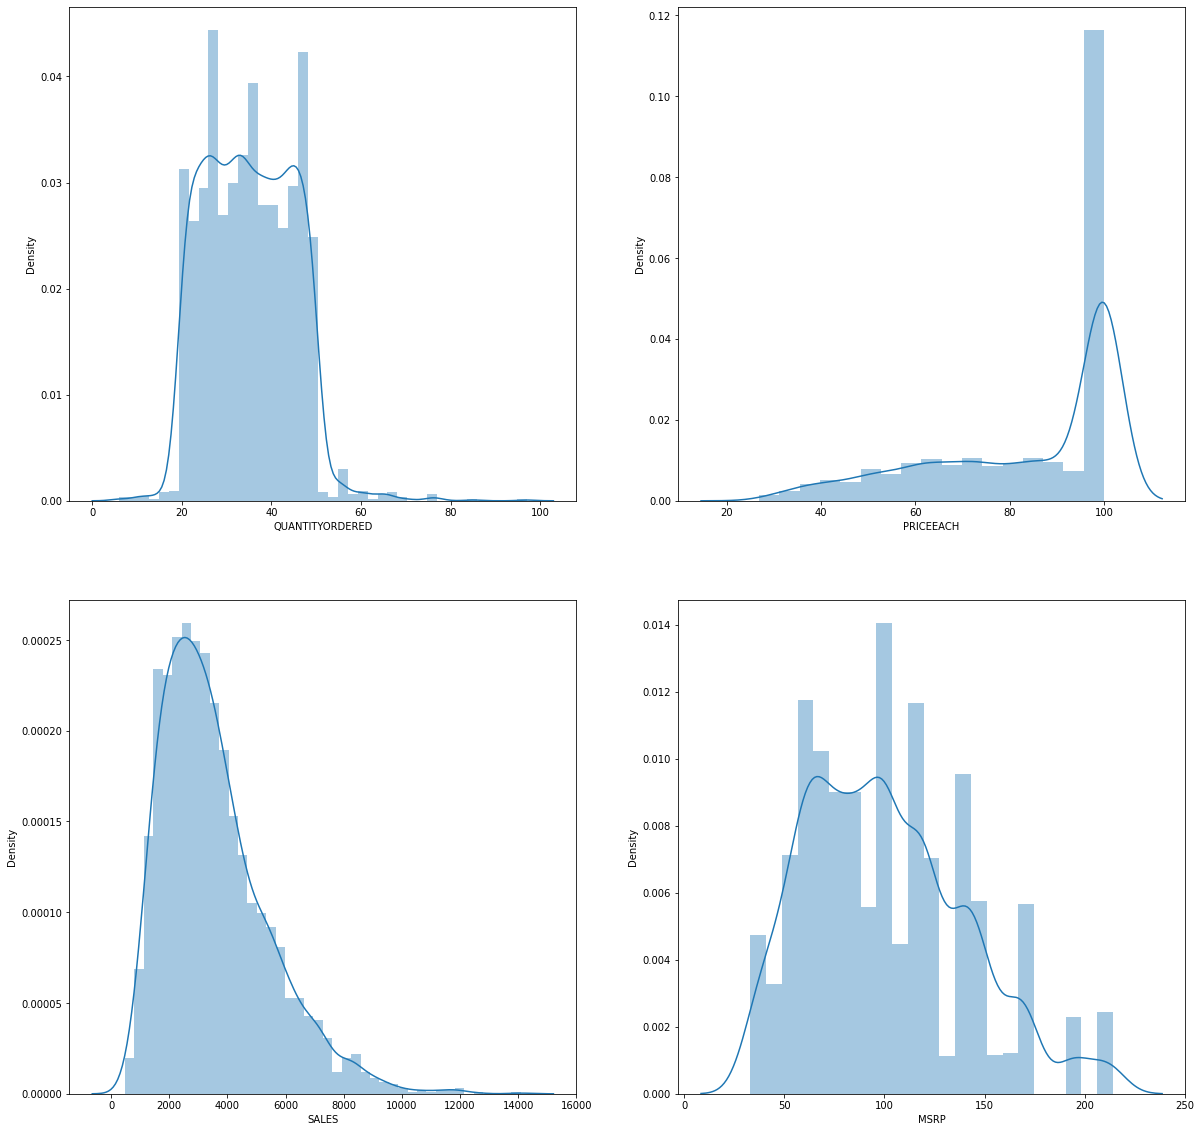

In [13]:
# plot distribution of numerical attributes
num_df = data[numerical_atts]
plt.figure(figsize=(20,20))
for i in range(1, 5):
  plt.subplot(2, 2, i)
  sns.distplot(num_df[num_df.columns[i-1]])

### Check Value of Categorical Data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [15]:
categorical_atts = data.drop(columns=numerical_atts).columns.to_list()

In [16]:
# number of unique values in categorical atts
data[categorical_atts].nunique()

ORDERNUMBER         307
ORDERLINENUMBER      18
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
PRODUCTCODE         109
CUSTOMERNAME         92
PHONE                91
ADDRESSLINE1         92
ADDRESSLINE2          9
CITY                 73
STATE                16
POSTALCODE           73
COUNTRY              19
TERRITORY             3
CONTACTLASTNAME      77
CONTACTFIRSTNAME     72
DEALSIZE              3
dtype: int64

###Missing data

In [17]:
# ตรวจสอบค่า Null
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

###Outlier

![iqr](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

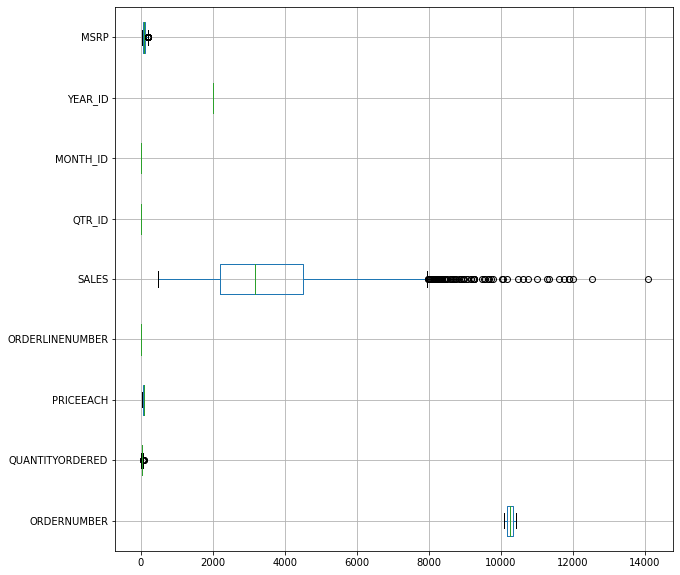

In [18]:
data.boxplot(vert=False, figsize=(10,10))

###Correlation

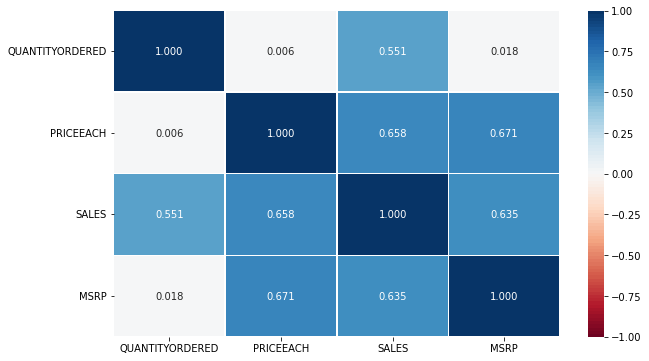

In [19]:
# correlation matrix
num_corr = num_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(num_corr, annot=True, fmt=".3f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("RdBu", 100))
plt.yticks(rotation=0)
plt.show()

#Data Preparation
การเตรียมข้อมูล

##Drop 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [21]:
data = data.drop(["PHONE","ADDRESSLINE1","ADDRESSLINE2","STATE","POSTALCODE","TERRITORY","CONTACTLASTNAME","CONTACTFIRSTNAME","ORDERDATE","PRODUCTCODE","ORDERNUMBER","ORDERLINENUMBER"],axis=1)

In [22]:
#ลบ "ข้อมูล" ที่เป็น null value ออก
data.dropna()

,QUANTITYORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,30,95.70,2871.00,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,USA,Small
1,34,81.35,2765.90,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,Reims,France,Small
2,41,94.74,3884.34,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,Paris,France,Medium
3,45,83.26,3746.70,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,Medium
4,49,100.00,5205.27,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,Shipped,4,12,2004,Ships,54,Euro Shopping Channel,Madrid,Spain,Small
2819,29,100.00,3978.51,Shipped,1,1,2005,Ships,54,"Oulu Toy Supplies, Inc.",Oulu,Finland,Medium
2820,43,100.00,5417.57,Resolved,1,3,2005,Ships,54,Euro Shopping Channel,Madrid,Spain,Medium
2821,34,62.24,2116.16,Shipped,1,3,2005,Ships,54,Alpha Cognac,Toulouse,France,Small


## Clean Outliers

In [23]:
# Check for outliers using boxplots and drop them
for num_att in numerical_atts:
    # Getting 75 and 25 percentile of variable "i"
    Q3, Q1 = np.percentile(data[num_att], [75,25])
    MEAN = data[num_att].mean()
    
    # Calculating Interquartile range
    IQR = Q3 - Q1
    
    # Calculating upper extream and lower extream
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Replacing all the outliers value to Mean
    data_clean=data.drop(data.loc[data[num_att]< minimum,num_att].index) 
    data_clean=data.drop(data.loc[data[num_att]> maximum,num_att].index)

In [24]:
len(data_clean)

2795

##Normalization

In [25]:
numerical_atts

['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

In [26]:
# transform data
numeric_transformer = MinMaxScaler()
#categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

# exclude target attribute
numerical_atts = [x for x in numerical_atts]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_atts)
        #('cat', 'passthrough', categorical_atts)
    ], remainder='passthrough')
data_pp = preprocessor.fit_transform(data_clean[numerical_atts])
data_trans = pd.DataFrame(data_pp, 
             columns = [numerical_atts])
data_trans

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
0,0.263736,0.941193,0.175644,0.356322
1,0.307692,0.744940,0.167916,0.356322
2,0.384615,0.928063,0.250150,0.356322
3,0.428571,0.771061,0.240030,0.356322
4,0.472527,1.000000,0.347273,0.356322
...,...,...,...,...
2790,0.153846,1.000000,0.129572,0.120690
2791,0.252747,1.000000,0.257074,0.120690
2792,0.406593,1.000000,0.362882,0.120690
2793,0.307692,0.483589,0.120143,0.120690


In [27]:
#นำข้อมูลออก
data_trans.to_excel('numerical_atts(Normalization).xlsx')

## Transform Categorical Data

In [28]:
categorical_atts = data_clean.drop(columns=numerical_atts).columns.to_list()

In [29]:
data_clean[categorical_atts].columns

Index(['STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'CUSTOMERNAME', 'CITY', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [30]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2795 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2795 non-null   int64  
 1   PRICEEACH        2795 non-null   float64
 2   SALES            2795 non-null   float64
 3   STATUS           2795 non-null   object 
 4   QTR_ID           2795 non-null   int64  
 5   MONTH_ID         2795 non-null   int64  
 6   YEAR_ID          2795 non-null   int64  
 7   PRODUCTLINE      2795 non-null   object 
 8   MSRP             2795 non-null   int64  
 9   CUSTOMERNAME     2795 non-null   object 
 10  CITY             2795 non-null   object 
 11  COUNTRY          2795 non-null   object 
 12  DEALSIZE         2795 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 305.7+ KB


In [31]:
# one-hot-encode categorical columns
def one_hot_encode(_dataframe, list_of_columns_to_one_hot_encode):
    for column in list_of_columns_to_one_hot_encode:
        # one-hot-encode this column
        one_hot_encoded_values = pd.get_dummies(_dataframe[column], prefix=column)

        # join the one-hot-encoded values with original dataframe
        _dataframe = pd.concat([_dataframe, one_hot_encoded_values], axis=1)

        # drop the original column, we don't need it anymore
        _dataframe.drop([column], axis=1, inplace=True)
    
    return _dataframe

# get a list of all columns with categorical values
categorical_columns = data_clean[categorical_atts].columns

data_trans = one_hot_encode(data_clean, categorical_columns)
data_trans.head()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP,STATUS_Cancelled,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,STATUS_Resolved,STATUS_Shipped,...,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,30,95.70,2871.00,95,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,34,81.35,2765.90,95,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,41,94.74,3884.34,95,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,45,83.26,3746.70,95,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,49,100.00,5205.27,95,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [62]:
data_trans

,QUANTITYORDERED,PRICEEACH,SALES,MSRP,STATUS_Cancelled,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,STATUS_Resolved,STATUS_Shipped,...,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,30,95.70,2871.00,95,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,34,81.35,2765.90,95,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,41,94.74,3884.34,95,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,45,83.26,3746.70,95,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,49,100.00,5205.27,95,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,54,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2819,29,100.00,3978.51,54,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2820,43,100.00,5417.57,54,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2821,34,62.24,2116.16,54,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## Pair Plot

In [32]:
data_trans.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'STATUS_Cancelled',
       'STATUS_Disputed', 'STATUS_In Process', 'STATUS_On Hold',
       'STATUS_Resolved', 'STATUS_Shipped',
       ...
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA',
       'DEALSIZE_Large', 'DEALSIZE_Medium', 'DEALSIZE_Small'],
      dtype='object', length=223)

In [33]:
data_trans

,QUANTITYORDERED,PRICEEACH,SALES,MSRP,STATUS_Cancelled,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,STATUS_Resolved,STATUS_Shipped,...,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,30,95.70,2871.00,95,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,34,81.35,2765.90,95,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,41,94.74,3884.34,95,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,45,83.26,3746.70,95,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,49,100.00,5205.27,95,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,54,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2819,29,100.00,3978.51,54,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2820,43,100.00,5417.57,54,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2821,34,62.24,2116.16,54,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


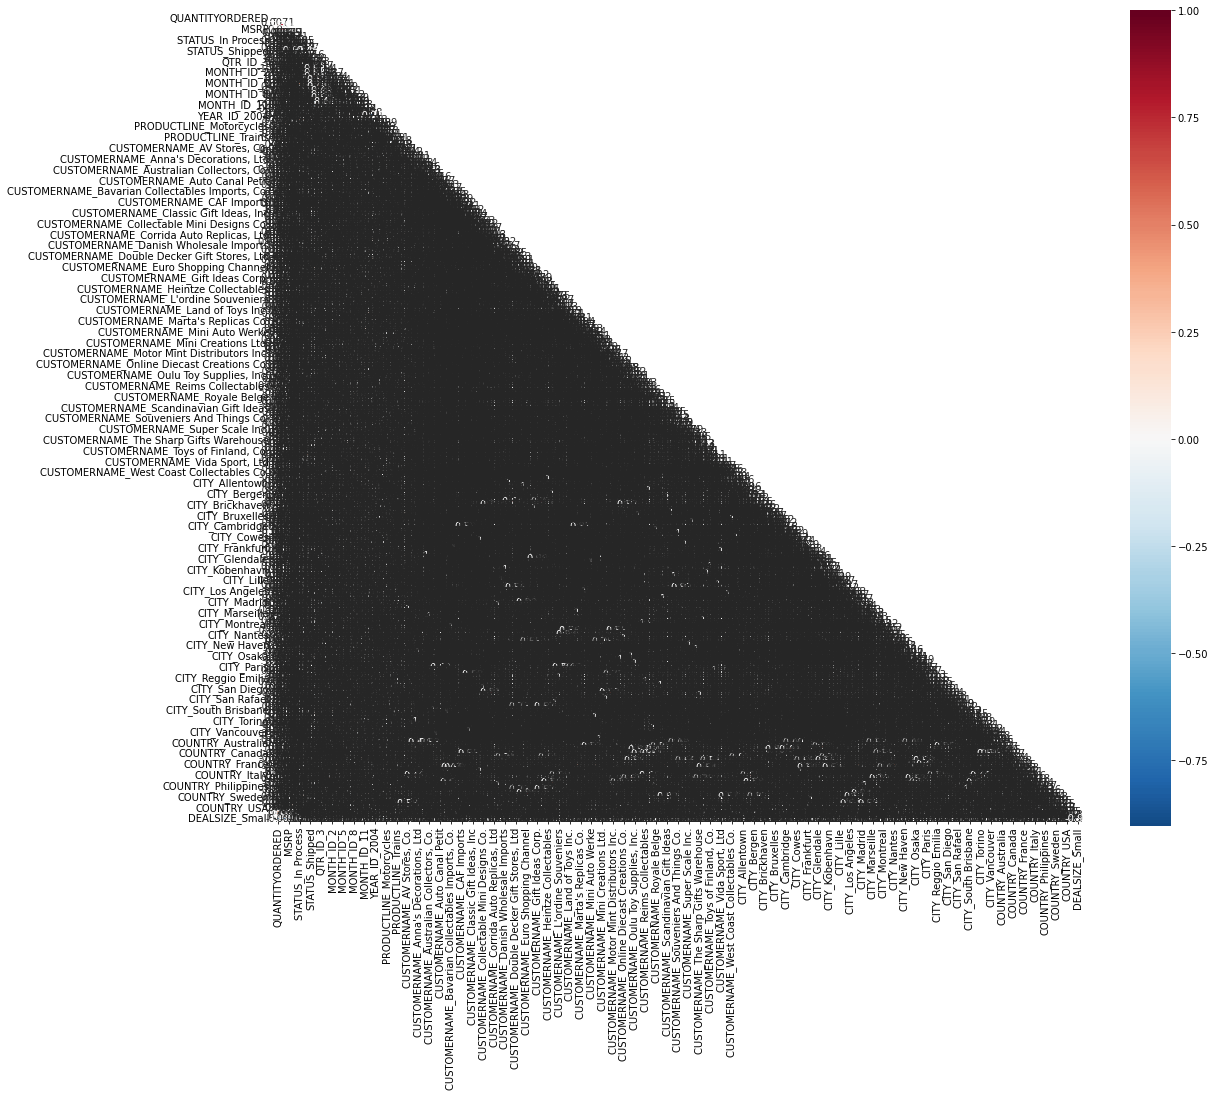

In [34]:
corr = data_trans.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))

sns.heatmap(corr, annot = True, mask=mask, cmap="RdBu_r", center=0,
            square=True, linewidths=.5)

#Model (Multiple Regression)

## Fix X

In [35]:
data_trans.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'STATUS_Cancelled',
       'STATUS_Disputed', 'STATUS_In Process', 'STATUS_On Hold',
       'STATUS_Resolved', 'STATUS_Shipped',
       ...
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA',
       'DEALSIZE_Large', 'DEALSIZE_Medium', 'DEALSIZE_Small'],
      dtype='object', length=223)

In [36]:
features = data_trans.drop(columns=['SALES']).columns.to_list()
#,'math score','reading score','writing score'
X = data_trans[list(features)]

## Feature Selection Function

In [37]:
# feature selection function
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

##SALES

### Fix y at SALES

In [43]:
features_SALES = data_trans.drop(columns=['SALES']).columns.to_list()
X = data_trans[list(features_SALES)]
y = data_trans['SALES']

### Train and Test Data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###Training Model

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Check coefficients

In [46]:
model.coef_

array([ 6.92006146e+01,  3.17806365e+01,  7.77999810e+00, -1.11251497e+13,
       -1.11251497e+13, -1.11251497e+13, -1.11251497e+13, -1.11251497e+13,
       -1.11251497e+13, -6.83755978e+12,  1.94704107e+11,  2.17935826e+12,
       -5.99858671e+10,  6.94911465e+12,  6.94911465e+12,  6.94911465e+12,
       -8.31492341e+10, -8.31492341e+10, -8.31492342e+10, -2.06780338e+12,
       -2.06780338e+12, -2.06780338e+12,  1.71540740e+11,  1.71540740e+11,
        1.71540740e+11, -1.00630012e+13, -1.00630012e+13, -1.00630012e+13,
       -3.61366723e+12, -3.61366723e+12, -3.61366723e+12, -3.61366723e+12,
       -3.61366723e+12, -3.61366723e+12, -3.61366723e+12,  1.44079504e+12,
        8.77553657e+11,  2.12387171e+10,  2.42843210e+12,  3.48704797e+12,
        3.23811304e+12,  1.96512044e+12,  1.81173736e+12,  5.88478065e+11,
        1.46050305e+12,  1.05743626e+12,  3.90747164e+12, -1.82222495e+11,
       -1.72216387e+12,  3.34286288e+12,  5.11198416e+12,  1.14806381e+12,
        1.19554427e+12,  

In [47]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coeff'])

,Coeff
QUANTITYORDERED,6.920061e+01
PRICEEACH,3.178064e+01
MSRP,7.779998e+00
STATUS_Cancelled,-1.112515e+13
STATUS_Disputed,-1.112515e+13
...,...
COUNTRY_UK,-2.474651e+12
COUNTRY_USA,-5.584159e+12
DEALSIZE_Large,2.314024e+13
DEALSIZE_Medium,2.314024e+13


###Predicting Test Data

In [48]:
y_pred = model.predict(X_test)
y_pred

array([3080.30908203, 4483.07470703, 4010.22314453, 2389.73095703,
       5450.39501953, 1616.55126953, 4877.62158203, 3820.10595703,
        710.00439453, 4314.59423828, 1838.56689453, 3951.23876953,
       2507.13720703, 2530.77783203, 3754.66064453, 5726.03564453,
       8210.51416016, 4707.69580078, 3183.62939453, 4681.07470703,
       2364.52392578, 1938.44189453, 3903.97314453, 4782.96533203,
       8134.27978516, 2563.73095703, 1599.41064453, 1596.31689453,
       2257.16845703, 5319.61376953, 1369.74267578, 4519.42236328,
        892.39892578, 2309.55908203, 2425.42236328, 3624.14892578,
       2510.70751953, 1365.33251953, 9209.02001953, 4191.24658203,
       8093.49072266, 2572.77783203, 4934.72314453,  850.29345703,
       4302.98876953, 3160.29736328, 1935.18408203, 2545.10595703,
        857.49658203, 2117.31689453, 1583.90283203, 2767.08642578,
       4072.18798828, 2027.07080078, 5060.50439453, 3981.93017578,
       3644.19189453, 4196.04345703, 2677.27783203, 2122.87158

วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred

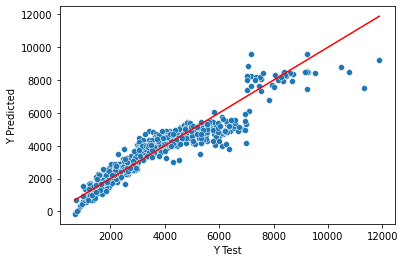

In [49]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
sns.lineplot(x=y_test, y=y_test, color='red')

###Evaluating Model 
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [50]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

Mean Absolute Error: 424.3875815470426
Mean Square Error: 361750.59141360136
Root Mean Square Error : 601.4570569987532


In [51]:
y.describe()

count     2795.000000
mean      3521.129095
std       1805.836643
min        482.130000
25%       2191.940000
50%       3169.950000
75%       4456.010000
max      14082.800000
Name: SALES, dtype: float64

In [52]:
print('Accuracy:',metrics.r2_score(y_test, y_pred)) 

Accuracy: 0.8892262277248013


###Residuals

In [53]:
res = y_test - y_pred
res.describe()

count     839.000000
mean       -6.550466
std       601.780122
min     -2384.607910
25%      -394.097285
50%       -25.170332
75%       227.367168
max      3811.205371
Name: SALES, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


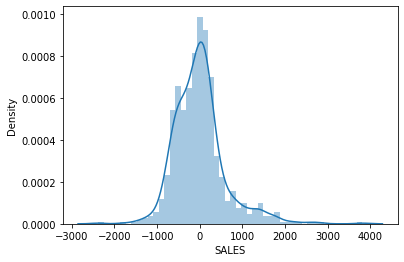

In [54]:
sns.distplot(res)

### Correlation Feature Selection

In [55]:
data_trans.head()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP,STATUS_Cancelled,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,STATUS_Resolved,STATUS_Shipped,...,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,30,95.70,2871.00,95,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,34,81.35,2765.90,95,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,41,94.74,3884.34,95,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,45,83.26,3746.70,95,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,49,100.00,5205.27,95,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 942.436300
Feature 1: 1510.752191
Feature 2: 1332.573751
Feature 3: 1.035857
Feature 4: 1.090072
Feature 5: 0.116032
Feature 6: 4.499632
Feature 7: 3.223077
Feature 8: 0.123878
Feature 9: 0.122047
Feature 10: 0.496483
Feature 11: 0.540943
Feature 12: 0.088883
Feature 13: 1.775303
Feature 14: 0.306997
Feature 15: 0.059618
Feature 16: 2.767207
Feature 17: 0.094274
Feature 18: 0.940022
Feature 19: 0.157552
Feature 20: 0.139155
Feature 21: 1.232353
Feature 22: 0.182793
Feature 23: 0.824333
Feature 24: 0.132313
Feature 25: 2.898640
Feature 26: 0.186456
Feature 27: 2.524884
Feature 28: 86.021898
Feature 29: 1.504855
Feature 30: 13.305488
Feature 31: 12.554163
Feature 32: 4.440310
Feature 33: 4.457888
Feature 34: 26.554832
Feature 35: 1.299552
Feature 36: 0.063299
Feature 37: 0.183444
Feature 38: 0.065734
Feature 39: 0.009024
Feature 40: 5.463589
Feature 41: 0.785363
Feature 42: 1.865452
Feature 43: 0.108998
Feature 44: 0.022041
Feature 45: 0.053357
Feature 46: 0.158437
Feature 47:

In [61]:
features_SALES

['QUANTITYORDERED',
 'PRICEEACH',
 'MSRP',
 'STATUS_Cancelled',
 'STATUS_Disputed',
 'STATUS_In Process',
 'STATUS_On Hold',
 'STATUS_Resolved',
 'STATUS_Shipped',
 'QTR_ID_1',
 'QTR_ID_2',
 'QTR_ID_3',
 'QTR_ID_4',
 'MONTH_ID_1',
 'MONTH_ID_2',
 'MONTH_ID_3',
 'MONTH_ID_4',
 'MONTH_ID_5',
 'MONTH_ID_6',
 'MONTH_ID_7',
 'MONTH_ID_8',
 'MONTH_ID_9',
 'MONTH_ID_10',
 'MONTH_ID_11',
 'MONTH_ID_12',
 'YEAR_ID_2003',
 'YEAR_ID_2004',
 'YEAR_ID_2005',
 'PRODUCTLINE_Classic Cars',
 'PRODUCTLINE_Motorcycles',
 'PRODUCTLINE_Planes',
 'PRODUCTLINE_Ships',
 'PRODUCTLINE_Trains',
 'PRODUCTLINE_Trucks and Buses',
 'PRODUCTLINE_Vintage Cars',
 'CUSTOMERNAME_AV Stores, Co.',
 'CUSTOMERNAME_Alpha Cognac',
 'CUSTOMERNAME_Amica Models & Co.',
 "CUSTOMERNAME_Anna's Decorations, Ltd",
 'CUSTOMERNAME_Atelier graphique',
 'CUSTOMERNAME_Australian Collectables, Ltd',
 'CUSTOMERNAME_Australian Collectors, Co.',
 'CUSTOMERNAME_Australian Gift Network, Co',
 'CUSTOMERNAME_Auto Assoc. & Cie.',
 'CUSTOMERNAME_Aut

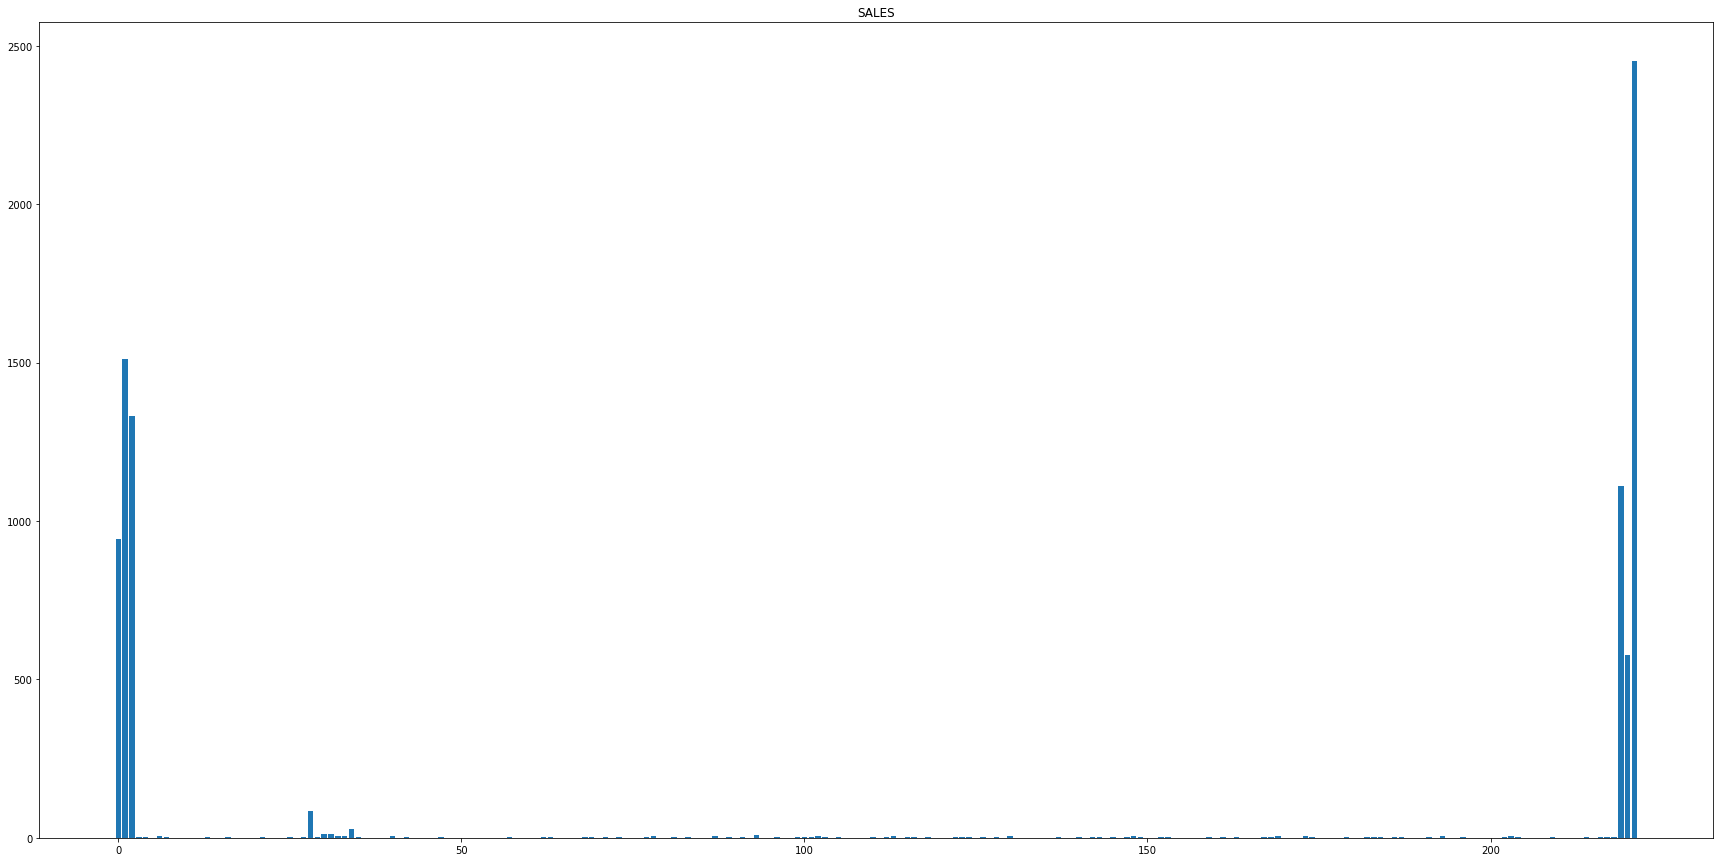

<Figure size 432x288 with 0 Axes>

In [64]:
# plot the scores
plt.figure(figsize=(30,15))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('SALES')
plt.show()
plt.savefig('SALES.png')